<a href="https://colab.research.google.com/github/aranyak1010/OIBSIP/blob/main/EDA_Retail_Level%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA LOADING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
retail=pd.read_csv('retail_sales_dataset.csv') #importing the dataset

In [ ]:
retail #displaying the dataset

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


#**CLEANING DATA**

In [ ]:
print("Dimension of the dataset:", retail.shape)
print("Size of the dataset: ", retail.size)
print("Columns in the dataset: ", retail.keys())

Dimension of the dataset: (1000, 9)
Size of the dataset:  9000
Columns in the dataset:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [ ]:
print("Information of the dataset: \n",retail.info())
print("After removing duplicates: \n",retail.drop_duplicates(inplace=True)) #cleaning the data by checking the duplicates
print("Size of the dataset after removing duplicates: \n",retail.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 9000


#There were no duplicates to remove.

# None of the columns contain any null value


#**DESCRIPTIVE STATISTICS**

In [ ]:
retail.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
print(retail[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())



   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


# The mean age of people visiting the shop is 41 and 75% of the shoppers are 53 years or below. The median of the age is 42.
#The mode for age is 43,64. The mode for Quantity is 4, price per unit is 50, and total amount is 50.

#**TIME SERIES ANALYSIS**

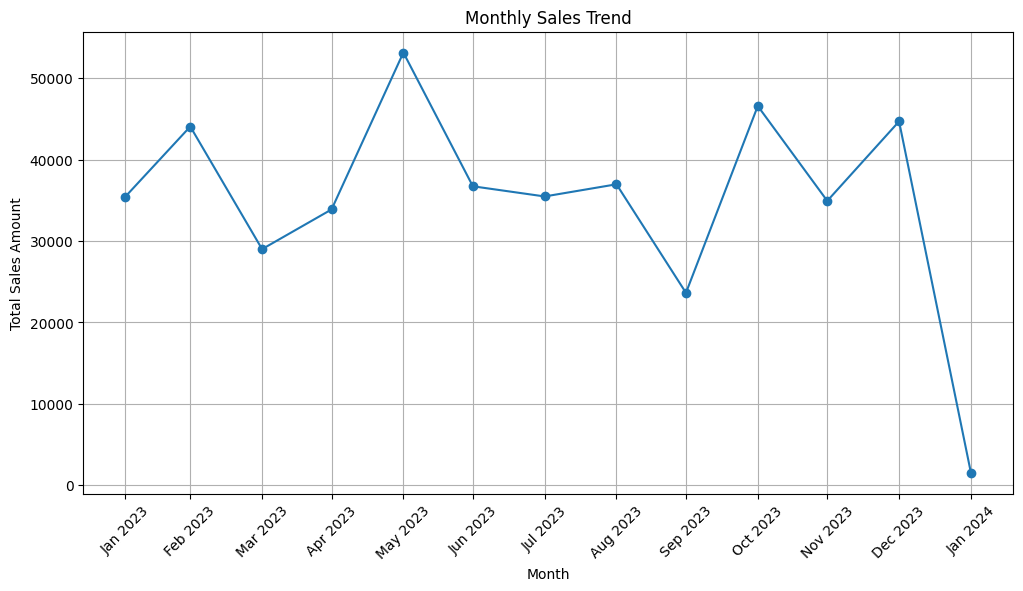

In [ ]:
retail['Date']=pd.to_datetime(retail['Date'])
monthly_sales = retail.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

# There was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023.

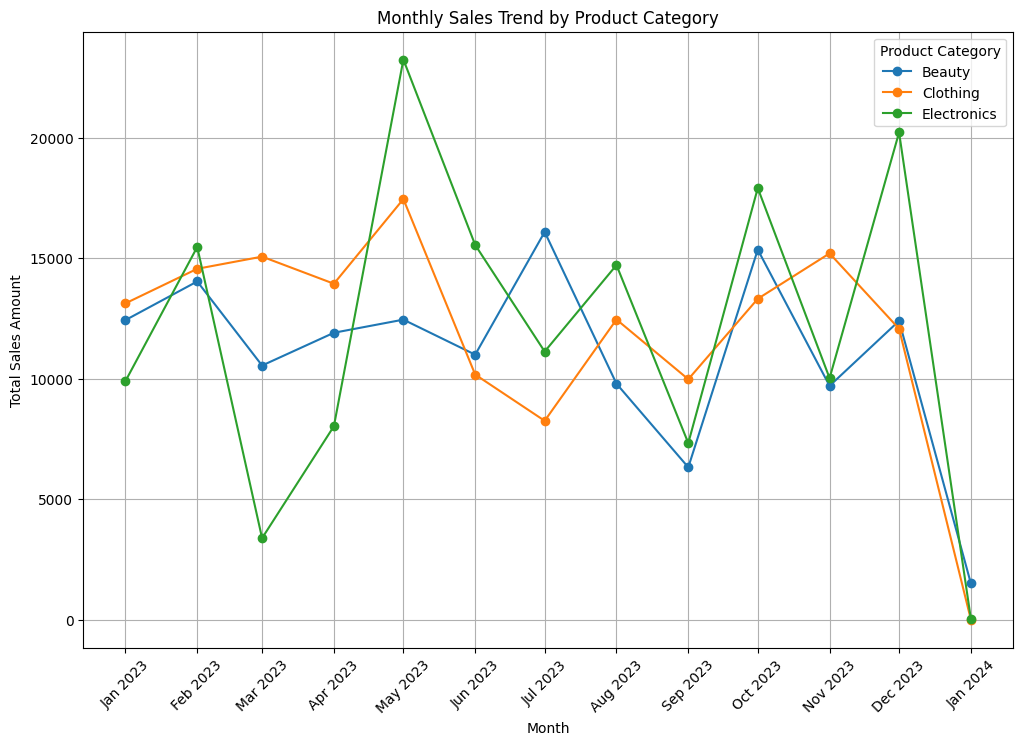

In [ ]:
monthly_category_sales = retail.groupby([retail['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(12, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)  # Convert index to timestamp and format the labels
plt.show()


#Here, we can see the total sales amount generated per month by the product categories. We see that in the month of March of 2023, there was a dip in sales in Electronics, which boomed in the month of May 2023, which was that year's highest sale for Electronics. Likewise, for Clothing, it reached its peak in the month of May 2023 but then dipped in the month of July 2023 and so on.
# In May, Electronics sales and Clothing peaked and Beauty sales remained moderate.

#We can make one observation, that is in the month of May 2023, two of three product categories fared well and generated a high sales amount, while in the month of September 2023, all the three categories did not generate high sales amount with Beauty reaching its all-time low, which suggests that something might have occurred in that particular month owing to low product sales.

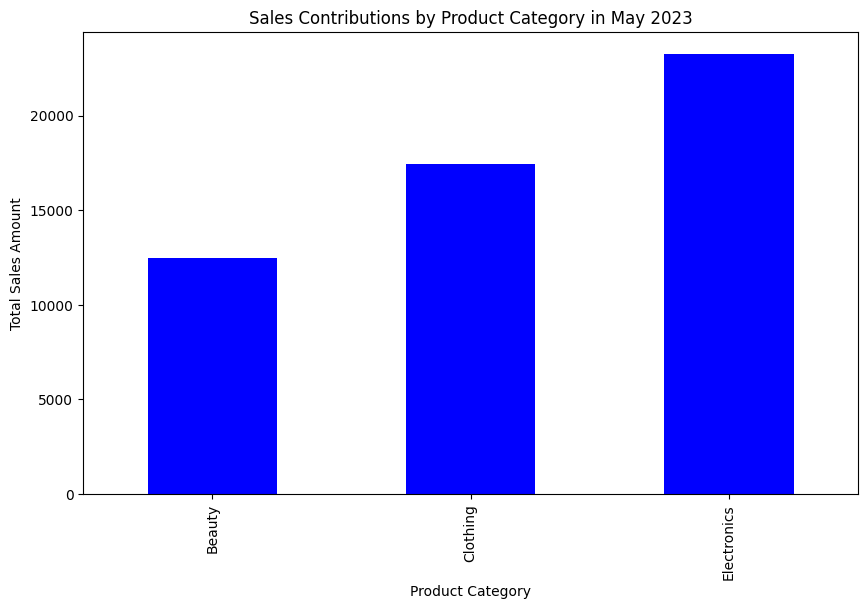

The total sales in the month of May is: 53150


In [ ]:
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = retail[(retail['Date'] >= start_date) & (retail['Date'] <= end_date)]

category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')


#Electronics contributed the maximum sales amount in the max sales month.

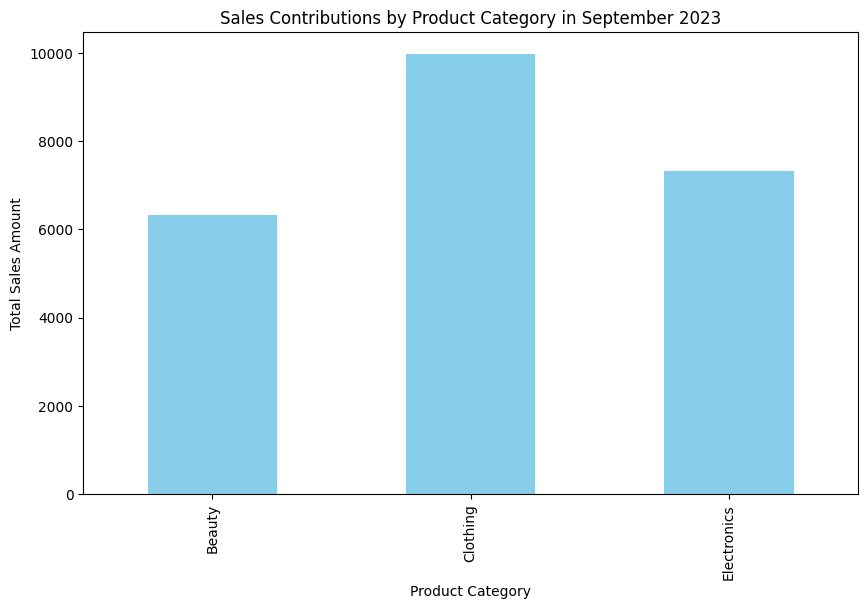

The total sales in the month of September is: 23620


In [ ]:
start_date = '2023-09-01'
end_date = '2023-09-30'
data_september = retail[(retail['Date'] >= start_date) & (retail['Date'] <= end_date)]

category_sales_september = data_september.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_september.plot(kind='bar', color='skyblue')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_september = data_september['Total Amount'].sum()
print(f"The total sales in the month of September is: {total_sales_september}")


#Beauty was sold the least in the least sold month.

In [ ]:
date_count = retail['Date'].groupby(retail['Date']).count()
max_count_date = date_count.idxmax()
print(f"The date with the highest number of transactions is {max_count_date} with {date_count[max_count_date]} transactions.")

The date with the highest number of transactions is 2023-05-16 00:00:00 with 11 transactions.


# On 16th May, 2023 the highest number of transactions happened.

Text(0.5, 1.0, 'Number of Transactions by Day')

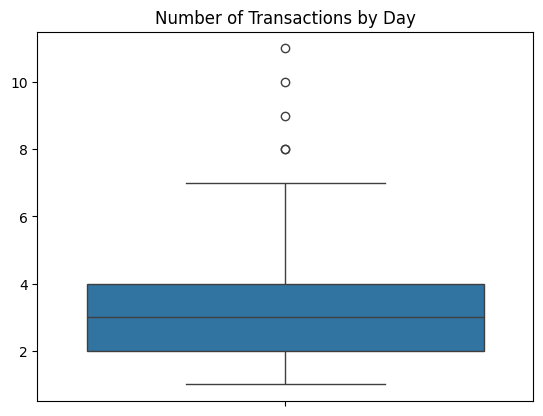

In [ ]:
sns.boxplot(y=date_count.values).set_title('Number of Transactions by Day')

#Since, majority of the transaction counts per day were falling between 2 and 4, the high number of transactions on 16th May was a significant outlier.

#**CUSTOMER AND PRODUCT ANALYSIS AND VISUALIZATION**

<Axes: >

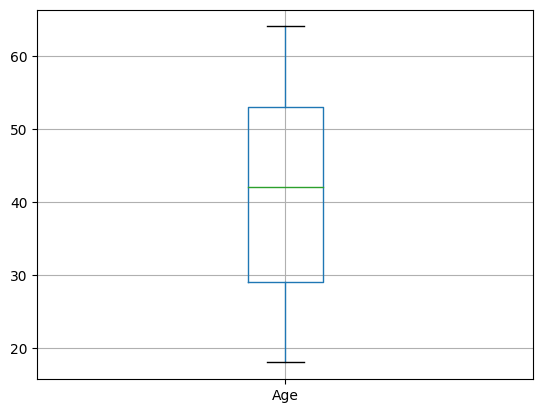

In [ ]:
retail.boxplot(column='Age',showfliers=True)

# The shoppers age distribution mostly lies between 29 and 53.

In [ ]:
unique = retail['Product Category'].unique()
for category in unique:
  print(category)

Beauty
Clothing
Electronics


Text(0.5, 1.0, 'Age distribution by product category')

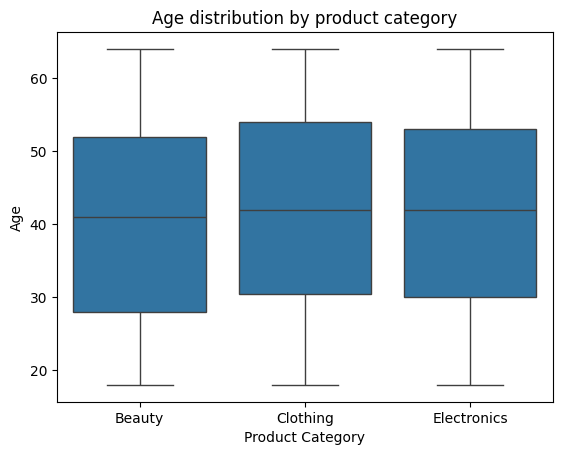

In [ ]:
sns.boxplot(x=retail['Product Category'],y=retail['Age'],data=retail).set_title('Age distribution by product category')

# The age distribution of the customers does not vary significantly based on the product category.

Text(0.5, 1.0, 'Age distribution by Gender')

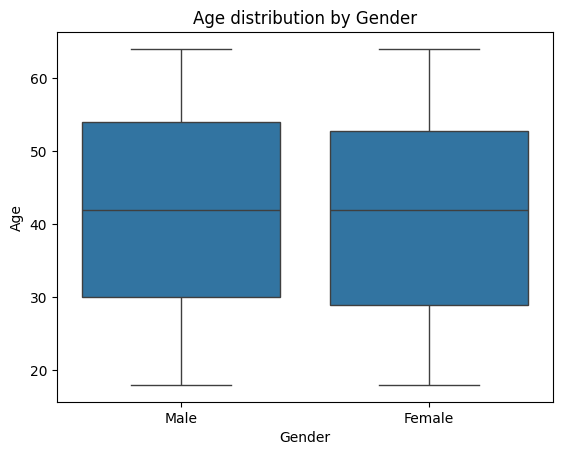

In [ ]:
sns.boxplot(x=retail['Gender'],y=retail['Age'],data=retail).set_title('Age distribution by Gender')

# The age distribution of the customers does not vary significantly based on the gender.

In [ ]:
print("Number of records based on gender in percentage: ",retail['Gender'].value_counts()/len(retail['Gender']))

Number of records based on gender in percentage:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


#Number of transactions between male and female are evenly distributed, signifying that there is no gender preference observed in the purchasing history for the retail outlet.

In [ ]:
print(retail['Total Amount'].max())
print(retail['Total Amount'].min())

2000
25


#The minimum total transaction amount observed was 25 and the maximum observed was 2000.

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

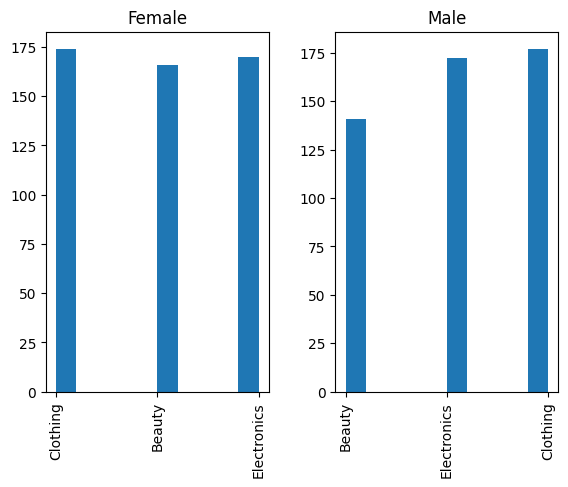

In [ ]:
retail.hist(column='Product Category',by='Gender')

# Female histogram shows that there is no significant preference of purchase between different product categories, while for male there is a significant lesser preference for beauty products.

<Axes: xlabel='Gender'>

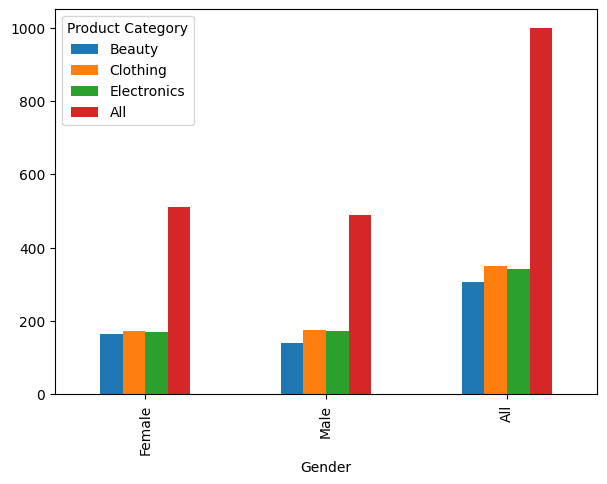

In [ ]:
pd.crosstab(retail['Gender'],retail['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

#This is another representation of the same inference.

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


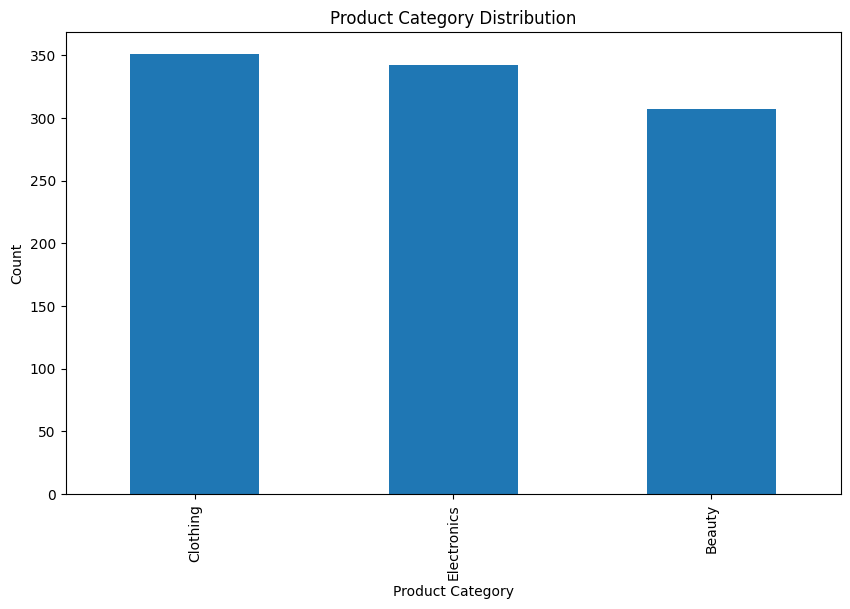

In [ ]:
product_category_distribution = retail['Product Category'].value_counts()
print(product_category_distribution)

product_category_distribution.plot(kind='bar', figsize=(10, 6), title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


#Here we can see that clothing products are sold more in terms of transactions and beauty products are transacted less, although there is no big difference between clothing and electronics both being transacted very high.

Gender
Female    510
Male      490
Name: count, dtype: int64


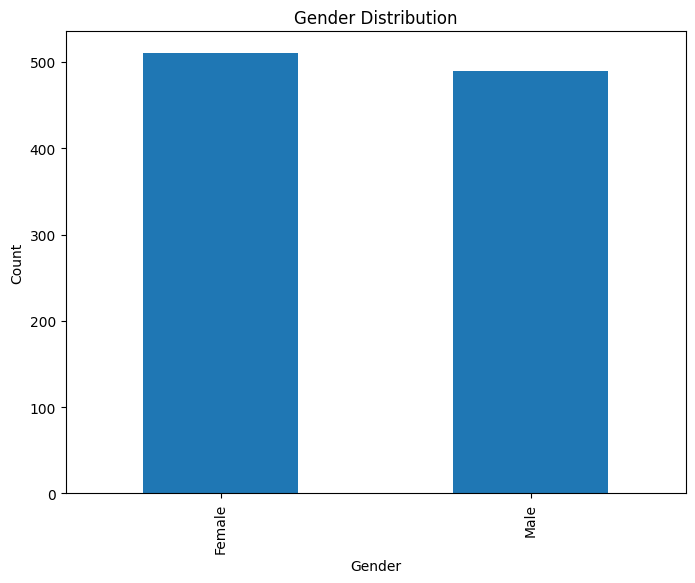

In [ ]:
gender_distribution = retail['Gender'].value_counts()
print(gender_distribution)

gender_distribution.plot(kind='bar', figsize=(8, 6), title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#We can see that the count of male and female customers are almost the same, with the male edging the female 510 to 490. This is shown in the  pie chart below.

Gender
Female    51.0
Male      49.0
Name: count, dtype: float64


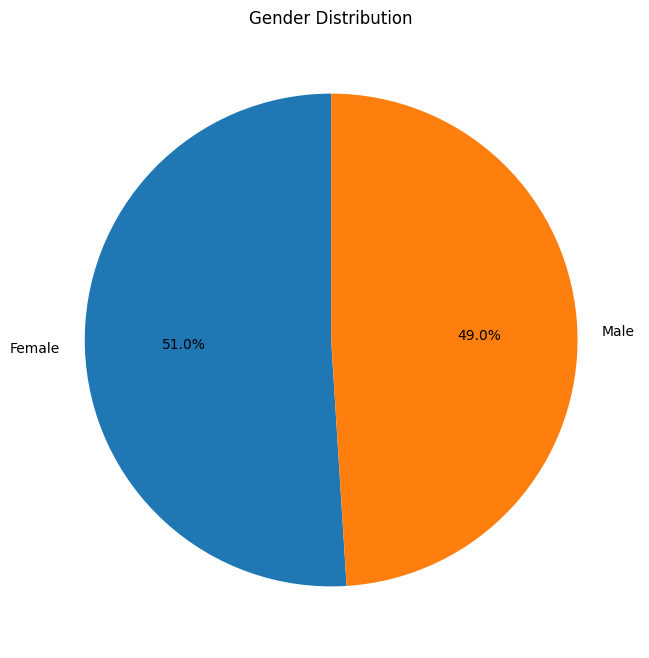

In [ ]:
gender_distribution_percentage = (gender_distribution / gender_distribution.sum()) * 100
print(gender_distribution_percentage)

gender_distribution_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Gender Distribution')
plt.ylabel('')
plt.show()


#This is the corresponding pie chart distinctly showing that there is no gender preference in the outlet.

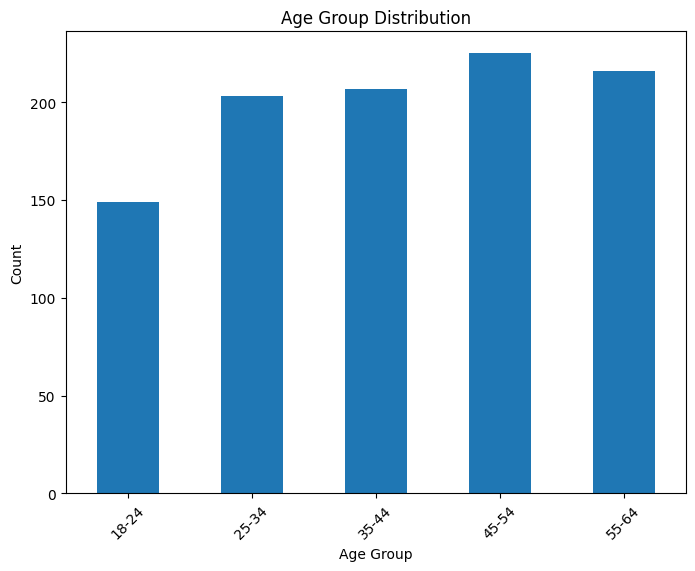

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
retail['Age Group'] = pd.cut(retail['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = retail['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.


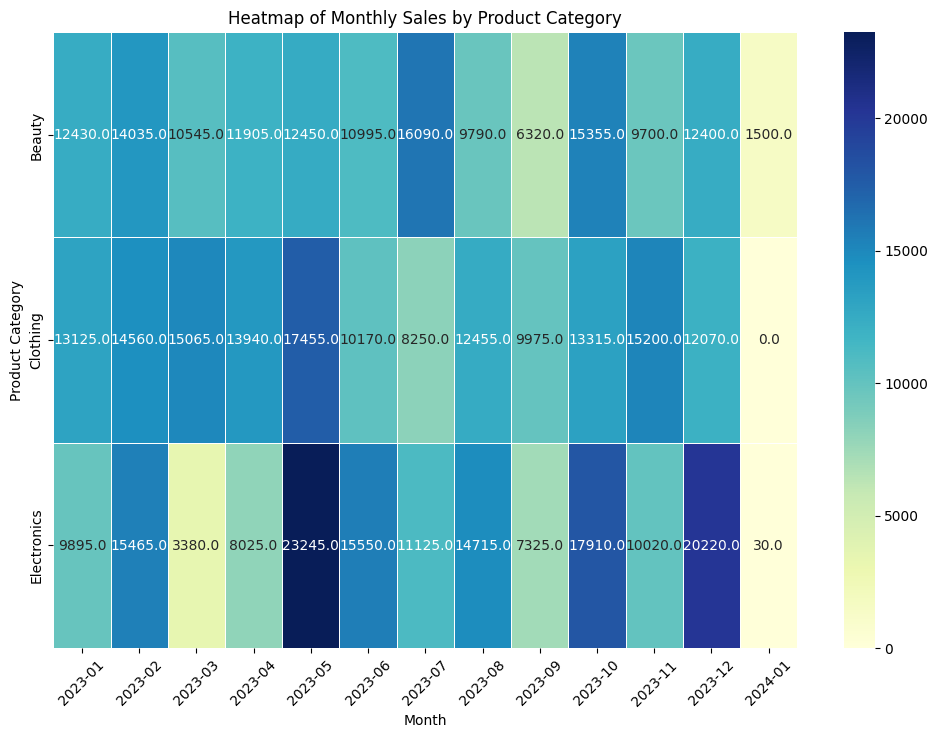

In [ ]:
retail['Month'] = retail['Date'].dt.to_period('M')

pivot_table = retail.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Heatmap of monthly sales
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()

# Here we can see that in the month of May 2023, Electronics contributed the most on that month and also overall. Similarly, it contributed the least in the month of March 2023 if we exclude 2024.
#Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most. Beauty had the most sales in July and the least in September.

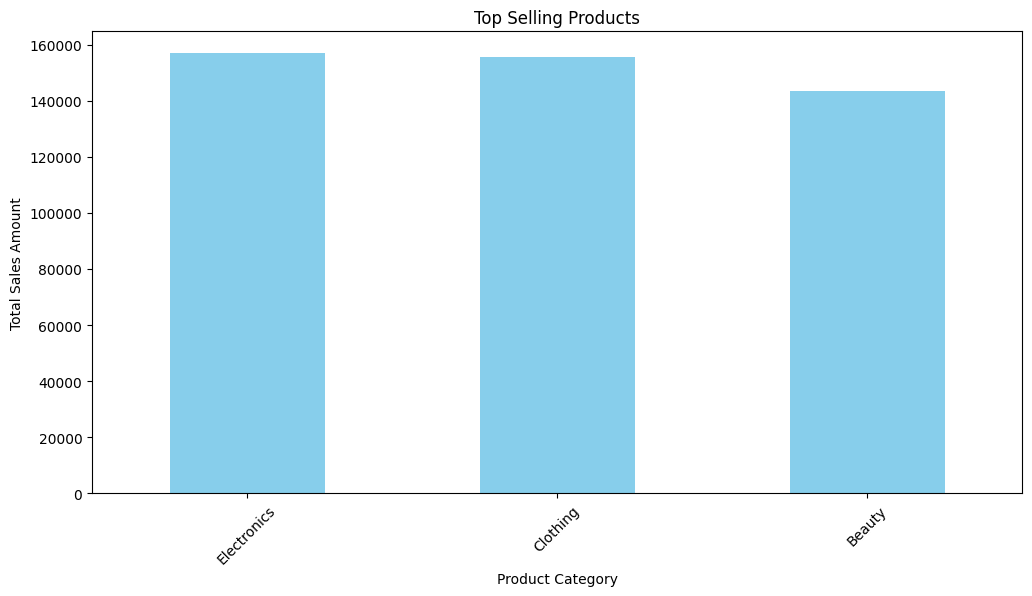

In [ ]:
# Top Selling Products
top_selling_products = retail.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

#Here, Electronics generated the most revenue followed by clothing although not significantly by a large difference, and Beauty generated the least revenue of the three.

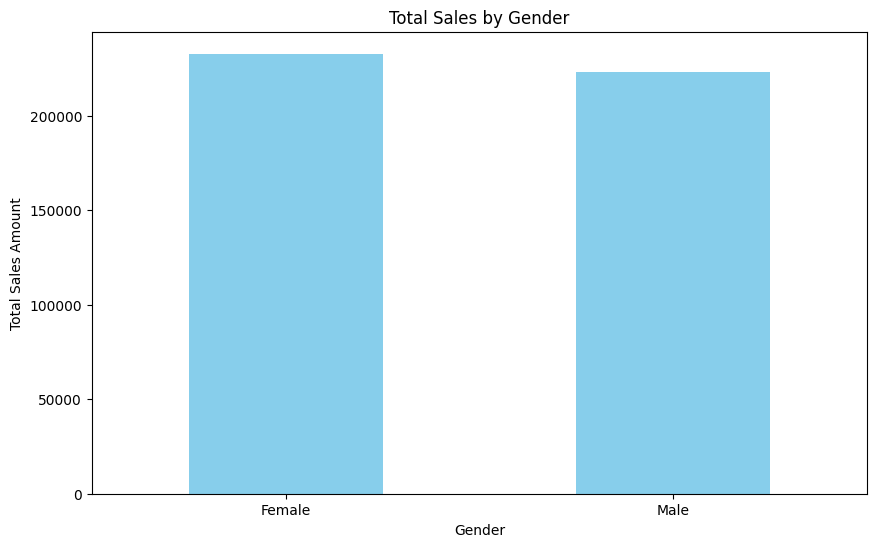

In [ ]:
# Customer Gender Analysis
gender_sales = retail.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
gender_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

#This suggests that females spend a lot as compared to males.

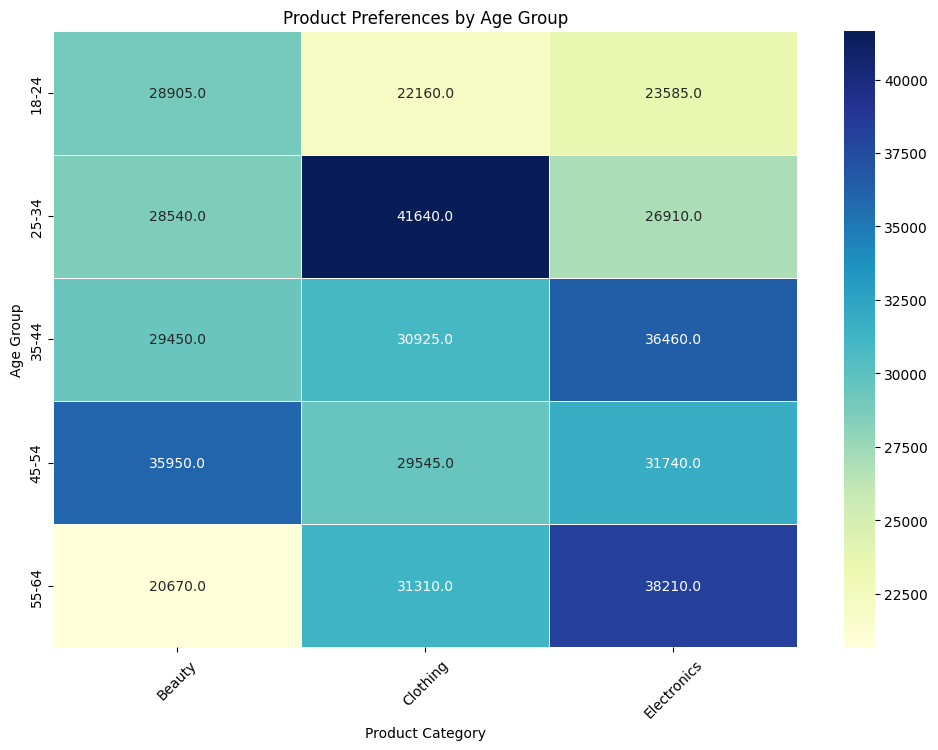

In [ ]:
# Product Preferences by Age Group
age_group_product_sales = retail.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(age_group_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

#We can observe that people in the age group of 25-34 tend to buy a lot of products in the category of Clothing while people in the age group of 55-64 do not buy Beauty products as frequently.

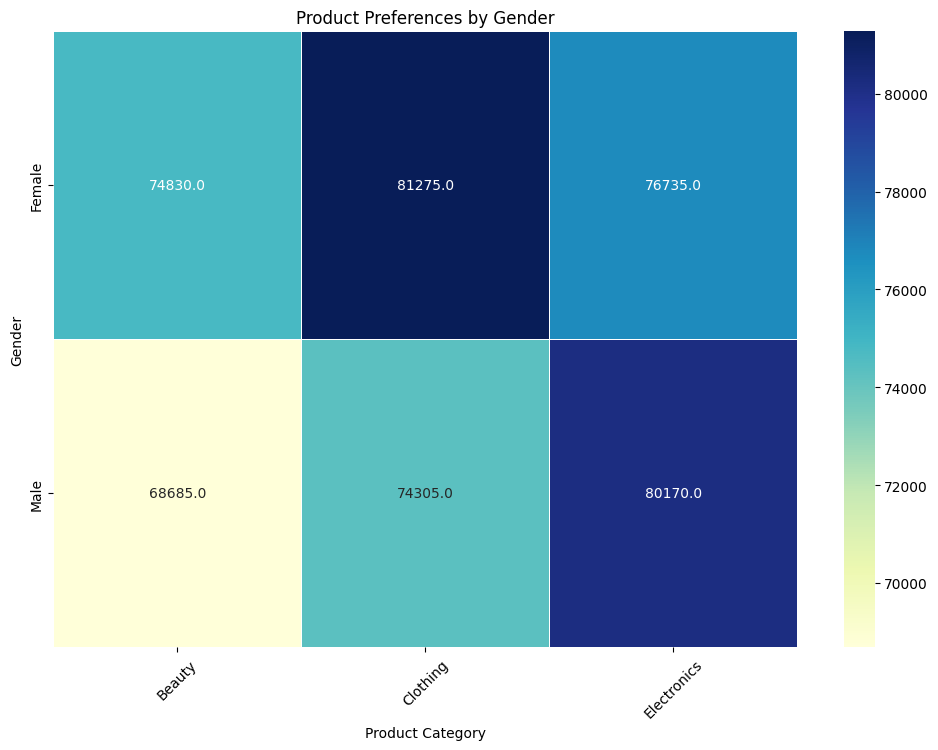

In [ ]:
# Product Preferences by Gender
gender_product_sales = retail.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

#Here, females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products.

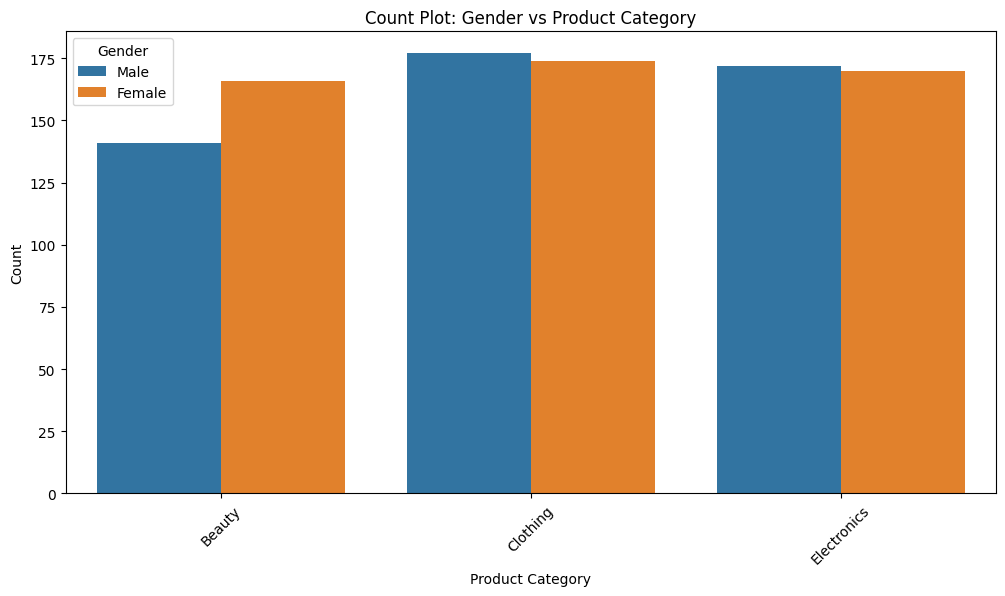

In [ ]:
# Count Plot: Count of Gender and Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=retail, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

#Here, males buy clothing products more frequently as compared to females. Females buy more beauty products as compared to males in terms of frequency.

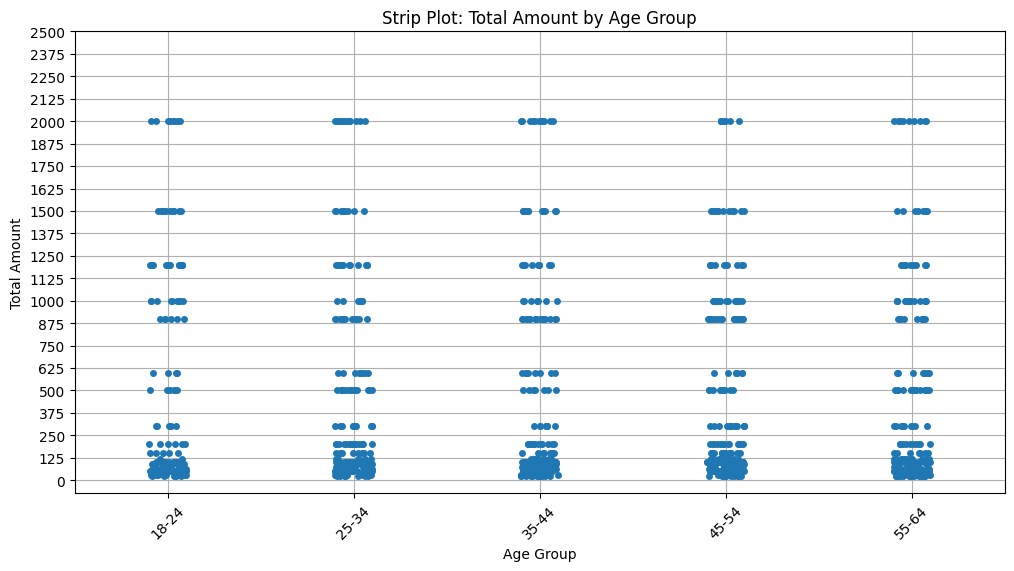

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=retail, x='Age Group', y='Total Amount', jitter=True)
plt.title('Strip Plot: Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.grid(True)
plt.yticks(range(0,2501,125))
plt.xticks(rotation=45)
plt.show()

#Here, we can see some inconclusive evidence to the frequency distribution of Total Amount vs the age groups.

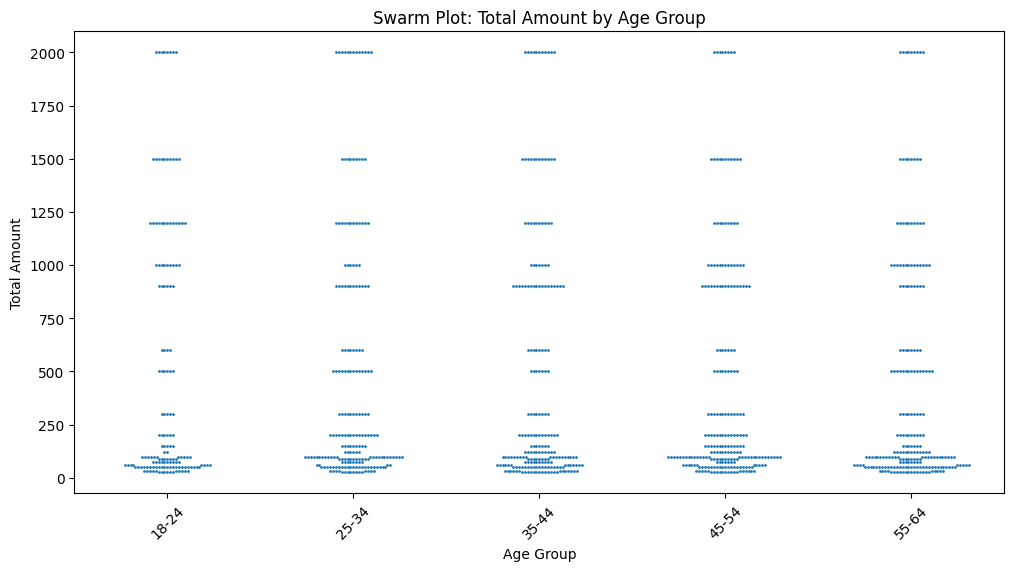

In [ ]:
# Swarm Plot: Total Amount by Age Group
plt.figure(figsize=(12, 6))
sns.swarmplot(data=retail, x='Age Group', y='Total Amount',size=2)
plt.title('Swarm Plot: Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

#Another plot to show the same conclusion.

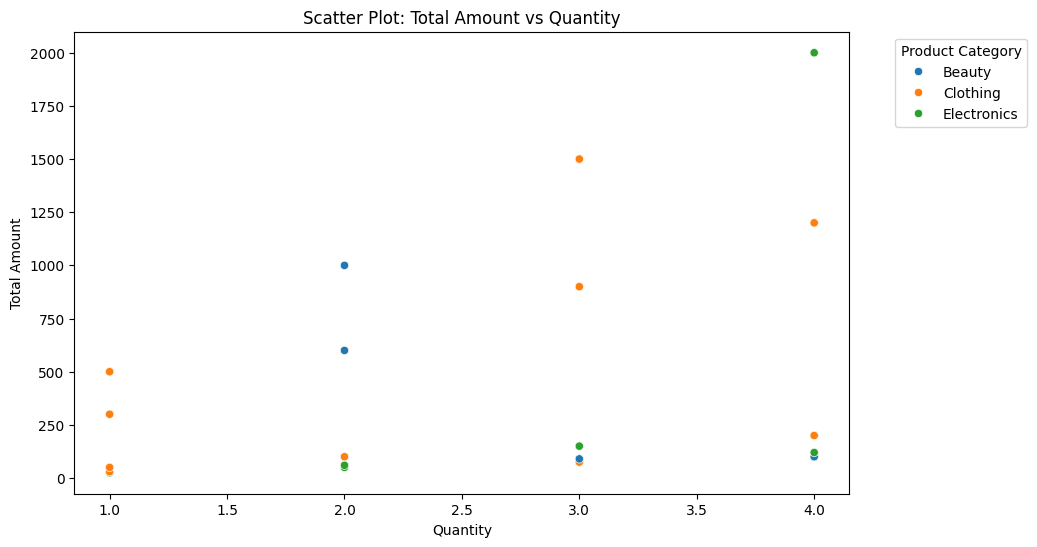

In [ ]:
# Scatter Plot: Total Amount vs Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=retail, x='Quantity', y='Total Amount', hue='Product Category', alpha=1)
plt.title('Scatter Plot: Total Amount vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#When the Clothing products are purchased with quantity 1, the total amount of transactions varies between 100-500, when the quantity goes up, the total amount jumps significantly to the range of 800-1500.
# For Beauty products, the total amount is highest when it is purchased in the quantity of 2. For any higher quantity the total amount falls significantly.
#For Electronics, the total amount can vary widely irrespective of quantity purchased.

<Figure size 1200x600 with 0 Axes>

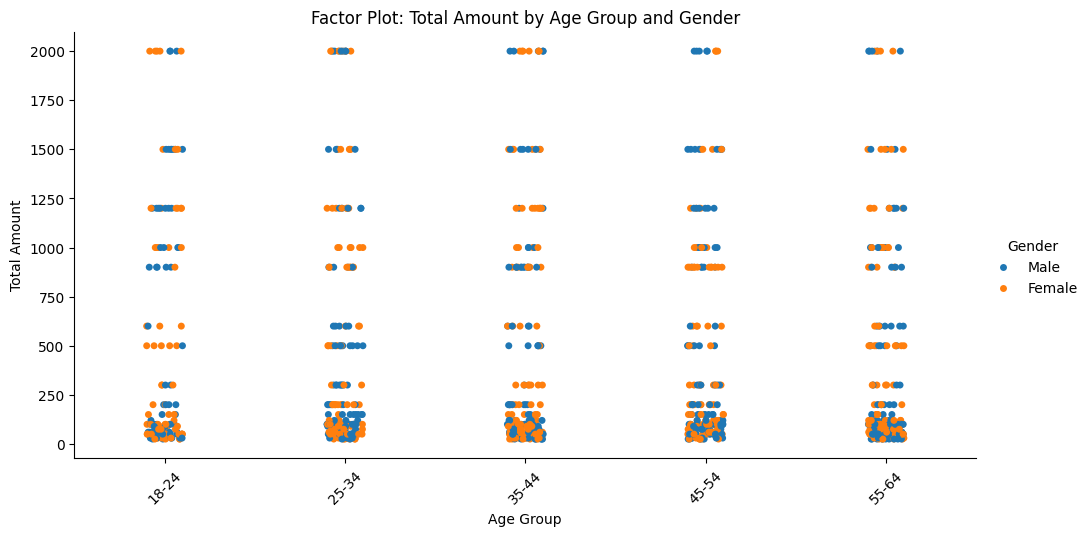

In [ ]:
# Factor Plot: Total Amount by Age Group and Gender
plt.figure(figsize=(12, 6))
sns.catplot(data=retail, x='Age Group', y='Total Amount', hue='Gender', kind='strip', jitter=True, aspect=2)
plt.title('Factor Plot: Total Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

#In this plot, we can still see some inconclusive evidence as to which gender in a particular age group spends the most. It might seem that for the age group 35-44, the females are more dominating when spending between 0-250 but as we go up the age group, the number of males are more in that price range.

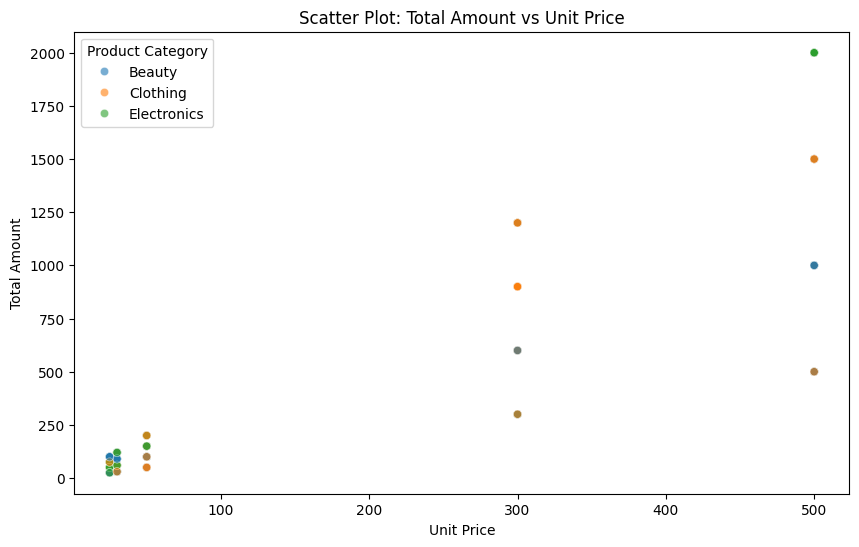

In [ ]:
# Scatter Plot: Total Amount vs Unit Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=retail, x='Price per Unit', y='Total Amount', hue='Product Category', alpha=0.6)
plt.title('Scatter Plot: Total Amount vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', loc='upper left')
plt.show()

#We can see that products which are priced in the range of 0-100, they are bought in more quantity although generate less revenue individually.

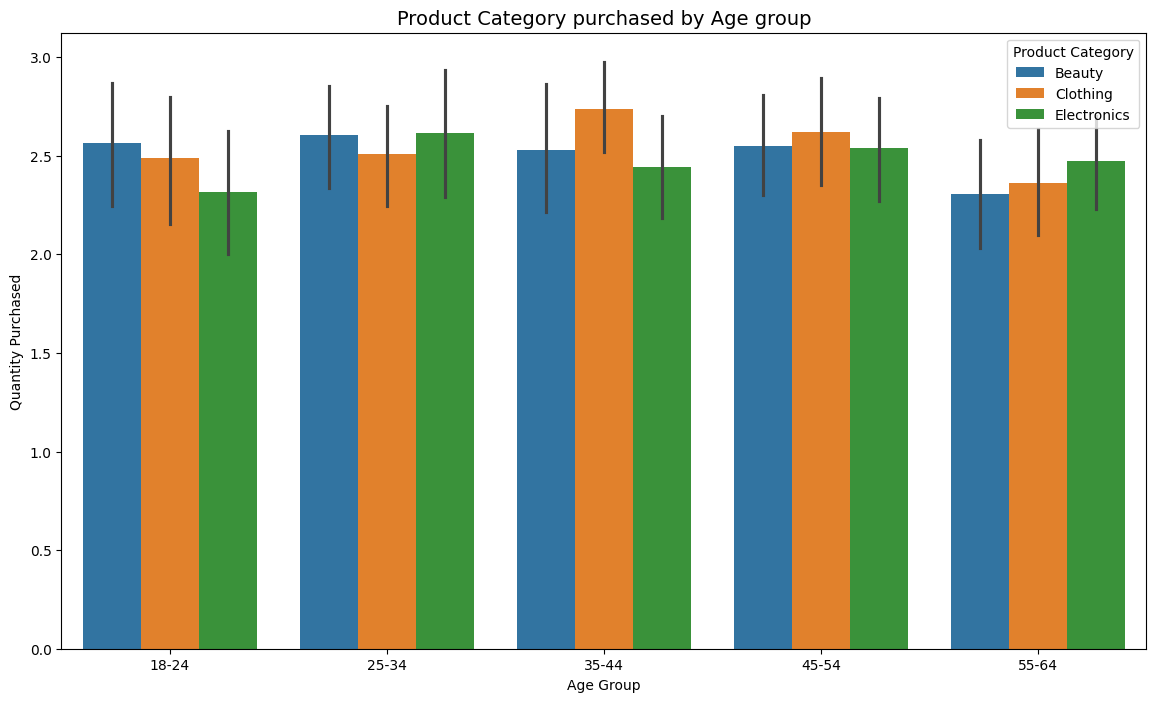

In [ ]:
# bar plot
plt.figure(figsize=(14,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=retail)
plt.title('Product Category purchased by Age group', fontsize=14)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Quantity Purchased', fontsize=10)
plt.show()

#For age group 18-24, Beauty products are more dominant as compared to Clothing and Electronics. Similarly, for age group 25-34, Beauty and Electronics are both equally bought and more than Clothing.

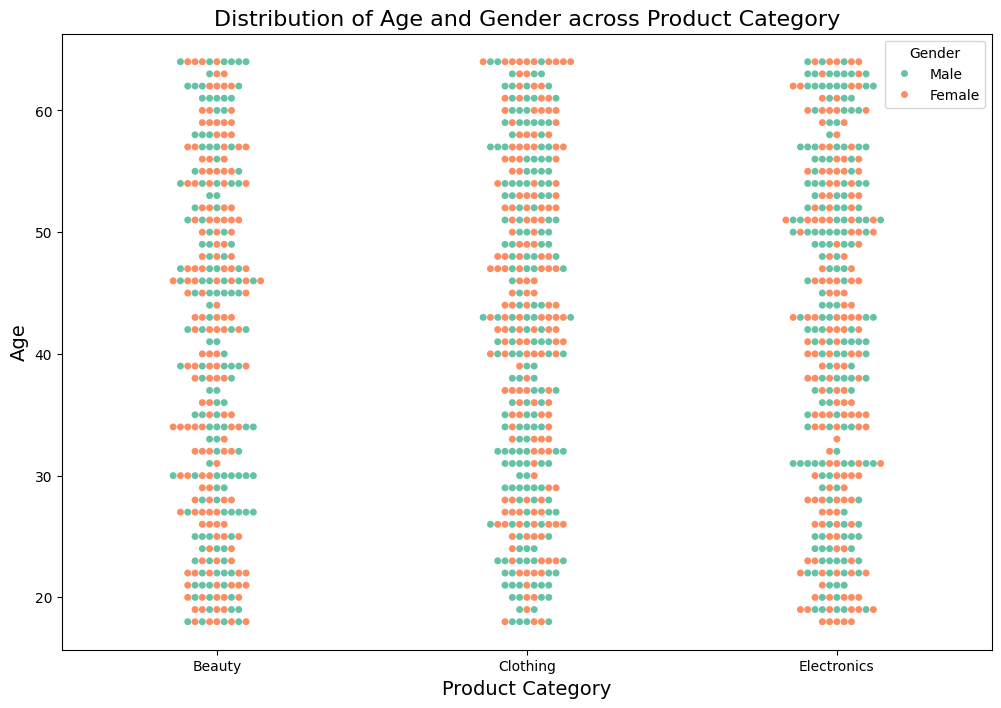

In [ ]:
# Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(12,8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=retail, palette='Set2')
plt.title('Distribution of Age and Gender across Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender', loc ='upper right', fontsize=10)
plt.show()

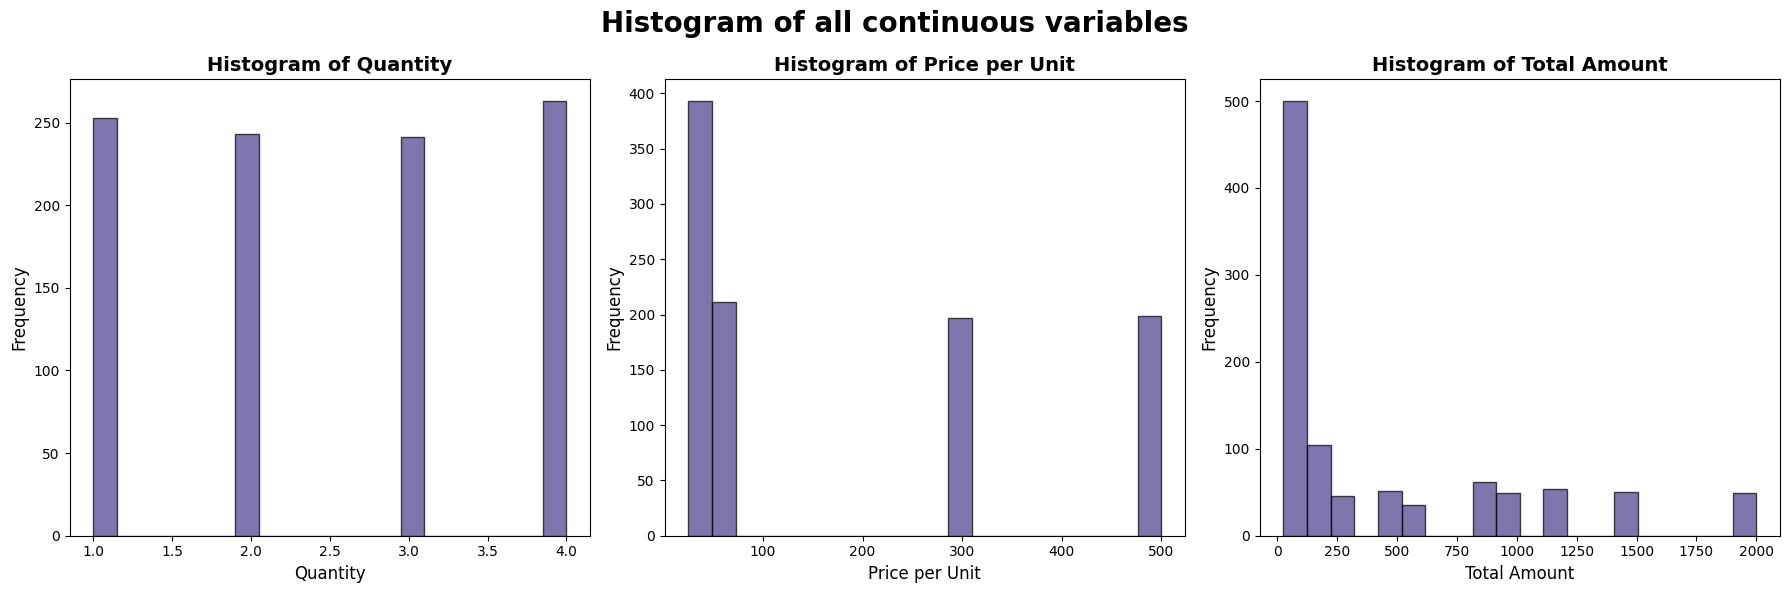

In [ ]:
# Create the histogram plot
plt.figure(figsize=(18, 6))

# Plot the histograms
plt.subplot(131)
plt.hist(retail['Quantity'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Quantity', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(132)
plt.hist(retail['Price per Unit'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Price per Unit', fontsize=14, fontweight='bold')
plt.xlabel('Price per Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(133)
plt.hist(retail['Total Amount'], bins=20, color='#483D8B', edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Amount', fontsize=14, fontweight='bold')
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.suptitle('Histogram of all continuous variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


#We can see that products in the range of 0-100 unit price are bought more frequently than other price ranges. Similarly, products which are bought as total price of about 150-200 are most frequently bought.

In [ ]:
cutoff_date = pd.to_datetime('2024-06-30')
retail_cutoff = retail[retail['Date'] < cutoff_date]
retail_cutoff_sorted = retail_cutoff.sort_values(by='Total Amount', ascending=False)
print(retail_cutoff_sorted[['Customer ID','Total Amount','Product Category']].head(5))

    Customer ID  Total Amount Product Category
571     CUST572          2000         Clothing
88      CUST089          2000      Electronics
502     CUST503          2000           Beauty
560     CUST561          2000         Clothing
831     CUST832          2000           Beauty


#The top 5 customers by total amount who have not purchased in the past 6 months are printed above with their preferred product categories.
#They are potential customer churn risks. They can be targeted for personalized marketing with their preferred product categories.

#**INFERENCES - AGE:**

(I) The mean age of people visiting the shop is 41 and 75% of the shoppers are 53 years or below. The median of the age is 42.

(II) The shoppers age distribution mostly lies between 29 and 53.

(III) By observing the graph, we can see that the most shoppers are between the age groups 45-54, while the least are made by 18-24 year olds.

(IV) The age distribution of the customers does not vary significantly based on the product category.
The age distribution of the customers does not vary significantly based on the gender.

(V) We can observe that people in the age group of 25-34 tend to buy a lot of products in the category of Clothing while people in the age group of 55-64 do not buy Beauty products as frequently.

(VI) For age group 18-24, Beauty products are more dominant as compared to Clothing and Electronics. Similarly, for age group 25-34, Beauty and Electronics are both equally bought and more than Clothing.

(VII) It might seem that for the age group 35-44, the females are more dominating when spending between 0-250 but as we go up the age group, the number of males are more in that price range.

#**RECOMMENDATIONS BASED ON AGE:**

The targeted customer segment for the shop can be made as aged between 29-53. Within that we can make the following subsegments:

(i) Age group 29-34 targeted for Clothing products as it is generating significantly higher revenue compared to other product categories in this age group.

(ii) Age group 34-53 targeted for all product categories as there is no significant difference in revenue generated between them.

(iii) Age group 35-44 females targeted for products with amount 0-250 range as they seem to be dominating this age group.

Accordingly, targeted marketing campaigns can be run for the above specific customer segments.
To add an emerging customer segment between age 45-54, a targeted marketing campaign for all product categories can be thought through based on the business strategy.



#**INFERENCES - TIME SERIES:**
(I)There was a significant slump in total sales in the month of September of 2023, while there was a significant rise in sales in the month of May of 2023.

(II)We can see the total sales amount generated per month by the product categories. We see that in the month of March of 2023, there was a dip in sales in Electronics, which boomed in the month of May 2023, which was that year's highest sale for Electronics. Likewise, for Clothing, it reached its peak in the month of May 2023 but then dipped in the month of July 2023 and so on.

(III)In May, Electronics sales and Clothing peaked and Beauty sales remained moderate.
We can make one observation, that is in the month of May 2023, two of three product categories fared well and generated a high sales amount, while in the month of September 2023, all the three categories did not generate high sales amount with Beauty reaching its all-time low, which suggests that something might have occurred in that particular month owing to low product sales.

(IV)Electronics contributed the maximum sales amount in the max sales month.
Beauty was sold the least in the least sold month.
On 16th May, 2023 the highest number of transactions happened.
Since, majority of the transaction counts per day were falling between 2 and 4, the high number of transactions on 16th May was a significant outlier.

(V)We can see that in the month of May 2023, Electronics contributed the most on that month and also overall. Similarly, it contributed the least in the month of March 2023 if we exclude 2024.
Clothing showed a steady trend across the months, with July 2023 contributing the least and May the most. Beauty had the most sales in July and the least in September.

#**RECOMMENDATIONS BASED ON TIME SERIES:**

(I) The month of May especially the date of 16th May is the sales leader across the months with electronics dominating the sales. Hence to maximize the revenue during that period or date further opportunity to market the Electronic products can be explored followed by the Clothing products.

(II)Also the month-on-month trend indicates Clothing sales going downwards hence something needs to be done about it.
Also the sales slump in the month of September needs to be closely investigated and proper action should be taken.


#**INFERENCE - GENDER:**
(I) Female histogram shows that there is no significant preference of purchase between different product categories, while for male there is a significant lesser preference for beauty products.

(II) Females spend the most on Clothing products and the least on Beauty while males spend most on Electronics and least on Beauty products.

(III)Males buy clothing products more frequently as compared to females. Females buy more beauty products as compared to males in terms of frequency.

#**RECOMMENDATIONS BASED ON GENDER:**
Since females show a tendency to buy Beauty products more frequently but spending least, the shop can introduce more high value female Beauty products to generate more revenue from the female customers.


#**INFERENCES - PRODUCT CATEGORY:**
(I) Electronics generated the most revenue followed by clothing although not significantly by a large difference, and Beauty generated the least revenue of the three.

(II) For Beauty products, the total amount is highest when it is purchased in the quantity of 2. For any higher quantity the total amount falls significantly.

(III) We can see that products which are priced in the range of 0-100, they are bought in more quantity although generate less revenue individually.
We can see that products in the range of 0-100 unit price are bought more frequently than other price ranges. Similarly, products which are bought as total price of about 150-200 are most frequently bought.

#**RECOMMENDATIONS BASED ON PRODUCT CATEGORY:**

(I)The Beauty product category seems to be laggard in terms of realising its full potential in generating the revenue as the comparatively higher range products are not purchased in high quantities and least price products are purchased more frequently without contributing to the revenue.
Strategy to be formulated to introduce, more high end Beauty products and market them aggressively.

(II) It is also observed that products with unit price range 0-200 are a crowd favourite. The shop can think about creating a specific product segment in this category with targeted marketing and shelf/section strategy for these products to give the customers a better shopping experience thus maximizing the revenue through this product mix.


#**INFERENCES - CUSTOMER BEHAVIOUR:**
The top 5 customers by total amount who have not purchased in the past 6 months are CUST572 for Clothing, CUST089 for Electronics, CUST503 for Beauty, CUST561 for Clothing, CUST 832 for Beauty.
          

#**RECOMMENDATIONS BASED ON CUSTOMER BEHAVIOUR:**
They are potential customer churn risks. They can be targeted for personalized marketing with their preferred product categories.

